In [15]:
import yfinance as yf
import pandas as pd

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,0,0
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,0,0
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,0,0


In [5]:
# show index
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-09-01', '2022-09-02', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15'],
              dtype='datetime64[ns]', name='Date', length=18295, freq=None)

<AxesSubplot:xlabel='Date'>

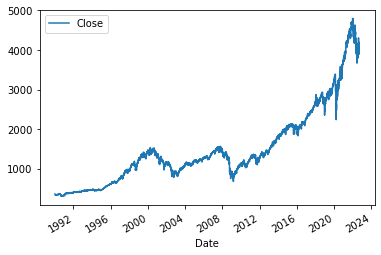

In [14]:
#Plot a line graph for the closing price
sp500.plot.line(y="Close", use_index=True)

In [7]:
# delete redundant columns

del sp500["Dividends"]
del sp500["Stock Splits"]

### Set up target for machine learning

In [19]:
# shift the days

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [20]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,4110.410156,1
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,3932.689941,0
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,3946.010010,1


In [21]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [22]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,4110.410156,1
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,3932.689941,0
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,3946.010010,1


In [24]:
sp500 = sp500.loc["1990-01-01":].copy()

In [26]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,4110.410156,1
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,3932.689941,0
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,3946.010010,1


### Training an Initial Machine Learning Model

> Random Forest Regressor work by training the many individual decision trees  with randomized parameter and  then averages from decision trees.

>  The higher the n_estimator, the better the model is

>  min_sample_split protect over_fitting. The higher is it set, the less  accurate the model 

>  if we ran the same model twice, we will get the same result when the random_state = 1

In [27]:

#import sklearn
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1 )

This is a time series data, so cross validation does not work with it. 
If you do, your result will be amazing with the training and worrible in the real world

In [28]:
# all rows except last 100 
train = sp500.iloc[:-100]

# the last 100 rows
test = sp500.iloc[-100:]

predictors = ["Close",  "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [29]:
# what percentage of the prediction we said went up actually went up
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


In [31]:
preds = pd.Series(preds, index=test.index)

In [32]:
preds

Date
2022-04-25    0
2022-04-26    0
2022-04-27    1
2022-04-28    0
2022-04-29    0
             ..
2022-09-09    1
2022-09-12    1
2022-09-13    1
2022-09-14    0
2022-09-15    1
Length: 100, dtype: int64

In [33]:
precision_score(test["Target"], preds)

0.4523809523809524

In [37]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

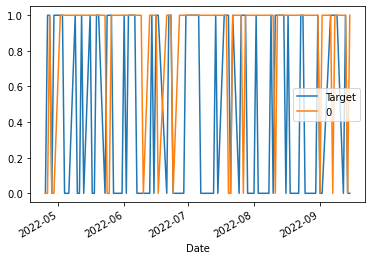

In [38]:
combined.plot()

### BUILDING A BACKTESTING SYSTEM